In [629]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from scipy.stats import f_oneway
from scipy.stats import ttest_ind


from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score


Dictionnaire des données   
- **Spend** : Remise tarifaire offerte aux clients à une date donnée, pour une super-région, un type d'appareil et une catégorie d'étoiles d'hôtel (en USD).
- **NBV A**: Valeur totale des réservations générée à une date donnée, pour une super-région, un type d'appareil et une catégorie d'étoiles d'hôtel, dans le groupe de test de tarification A (en USD).
- **NBV B** : Valeur totale des réservations générée à une date donnée, pour une super-région, un type d'appareil et une catégorie d'étoiles d'hôtel, dans le groupe de test de tarification B (en USD).
- **Date** : Date à laquelle les métriques sont reportées (données journalières).
- **Hotel Super region** : Localisation de l'hôtel réservé.
    + NORAM = Amérique du Nord
    + LATAM = Amérique du Sud et Amérique Centrale
    + APAC = Asie & Pacifique
    + EMEA = Europe et Moyen-Orient
- **Device** : Type d'appareil (mobile ou ordinateur) utilisé pour réserver l'hôtel.
- **StarRating** : Catégorie d'étoiles de l'hôtel réservé.
   + "Low" correspond aux hôtels économiques
   + "High" correspond aux hôtels de luxe

In [630]:
data = pd.read_excel("Pricing.xlsx")
df = data.copy()

In [631]:
df.columns

Index(['date', 'HotelSuperRegion', 'Device', 'StarRating', 'spend', 'NBV A',
       'NBV B'],
      dtype='object')

Statistiques univariée

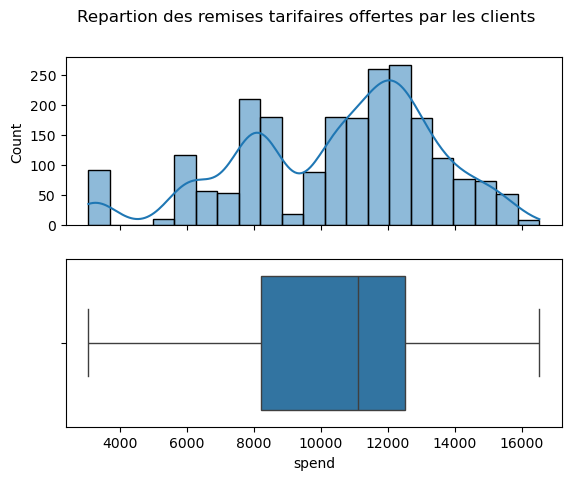

In [632]:
fig, ax = plt.subplots(2,1, sharex=True)
plt.suptitle("Repartion des remises tarifaires offertes par les clients")
sns.histplot(data=df, x="spend", kde=True,ax=ax[0])
sns.boxplot(data=df, x="spend", ax=ax[1])
plt.show()

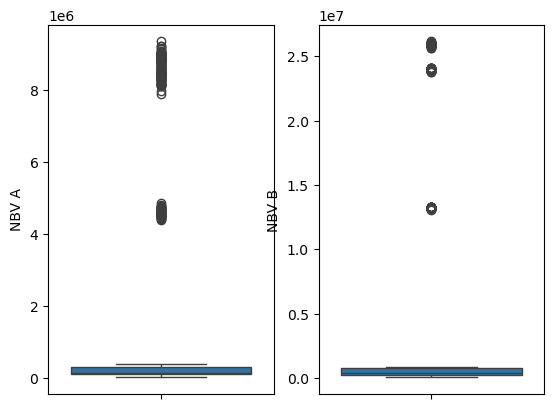

In [633]:
fig, ax = plt.subplots(1,2)
sns.boxplot(data=df, y="NBV A", ax=ax[0])
sns.boxplot(data=df, y="NBV B", ax=ax[1])
plt.show()

Statistique bivariée 

* Distribution des Remises tarifaires offerte aux clients selon la catégorie d'étoile, selon la region, et selon l'appareil utiliser pour la reservation

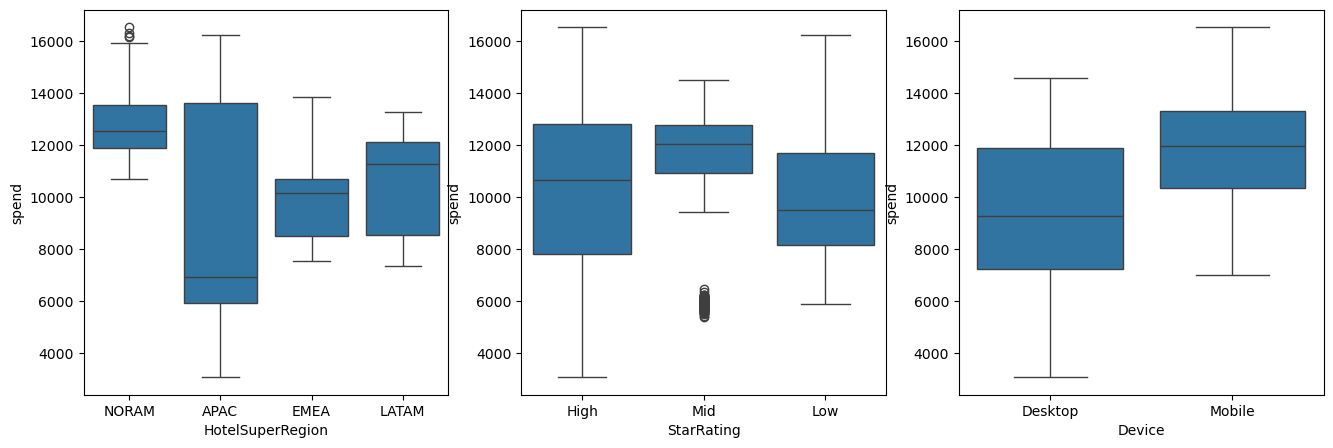

In [634]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
sns.boxplot(data=df, y="spend",x="HotelSuperRegion",ax=ax[0])
sns.boxplot(data=df, y="spend",x="StarRating",ax=ax[1])
sns.boxplot(data=df, y="spend",x="Device",ax=ax[2])
plt.show()

* Distribution des Valeur totale des réservations générée à une date donnée, pour une super-région,   
un type d'appareil et une catégorie d'étoiles d'hôtel, dans le groupe de test de tarification A (en USD).

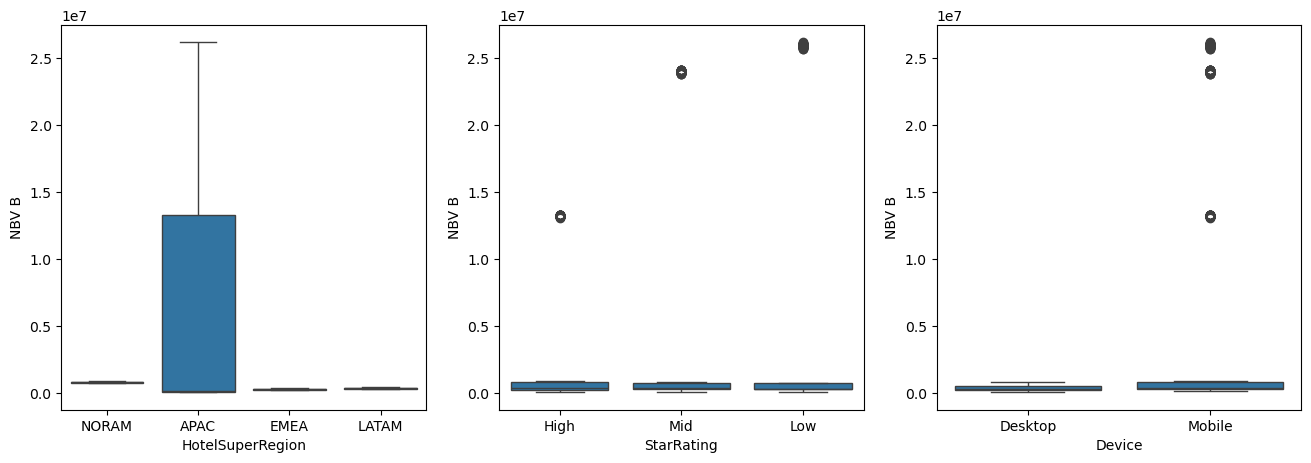

In [635]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
sns.boxplot(data=df, y="NBV B",x="HotelSuperRegion",ax=ax[0])
sns.boxplot(data=df, y="NBV B",x="StarRating",ax=ax[1])
sns.boxplot(data=df, y="NBV B",x="Device",ax=ax[2])
plt.show()

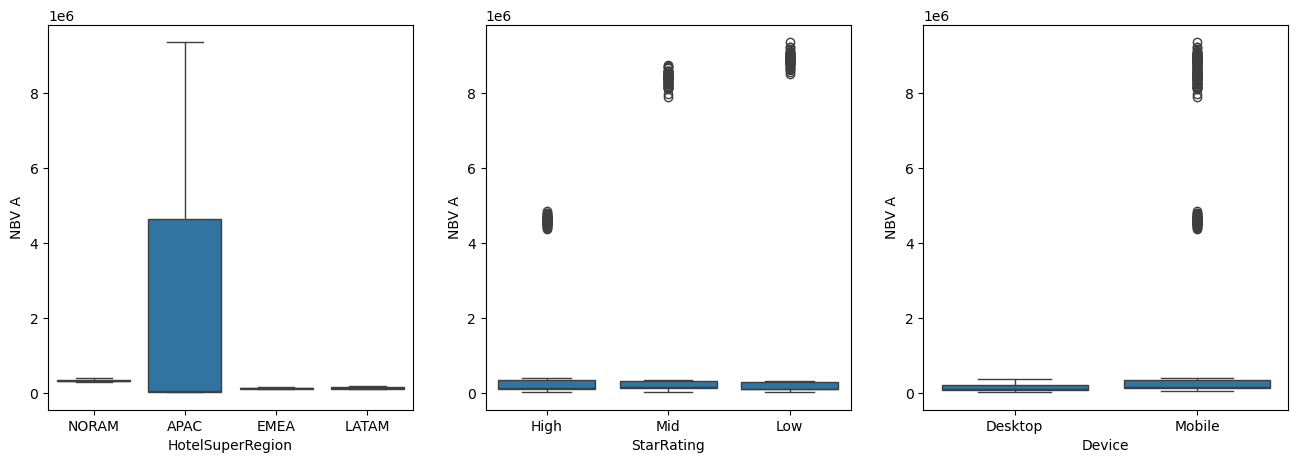

In [636]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
sns.boxplot(data=df, y="NBV A",x="HotelSuperRegion",ax=ax[0])
sns.boxplot(data=df, y="NBV A",x="StarRating",ax=ax[1])
sns.boxplot(data=df, y="NBV A",x="Device",ax=ax[2])
plt.show()

Relation entre NBV A et NBV B

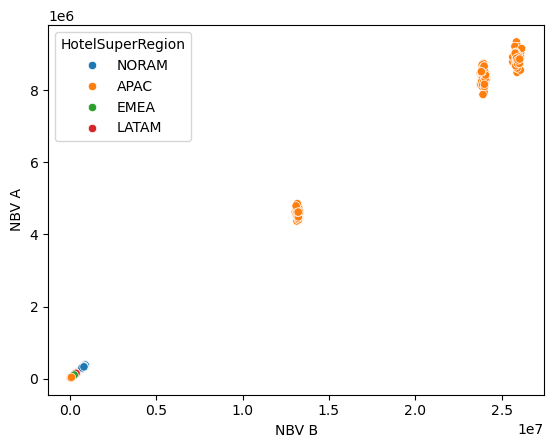

In [637]:
sns.scatterplot(data=df, x="NBV B", y="NBV A", hue="HotelSuperRegion")
plt.show()

Relatiion entre NBV A et NBV B et Spend 

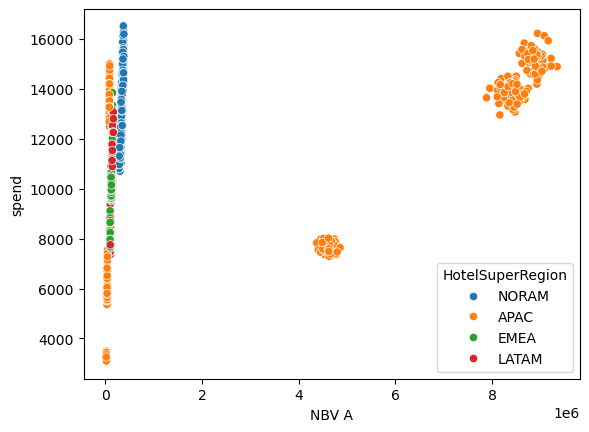

In [638]:
sns.scatterplot(data=df, x="NBV A", y="spend", hue="HotelSuperRegion")
plt.show()

Test d'hypothses 

1. Test d'Anova

- Les remises tarifaire offertes par les clients sont les mêmes selon la region

In [639]:
print("H0 :\" Les remises tarifaire offertes par les clients sont les mêmes selon la region\"")
print()

alpha=0.02
p_value = f_oneway(*df.groupby("HotelSuperRegion")["spend"].apply(list)).pvalue
if p_value < alpha:
    print("Nous avons suffisamment d'evidence pour rejeter H0:")
    print("Ainsi il y a une difference significatives sur Les remises tarifaire offertes par les clients sont les mêmes selon la region")
else:
    print("Nous n'avons pas sufisament d'epreuve pour rejeter H0")

H0 :" Les remises tarifaire offertes par les clients sont les mêmes selon la region"

Nous avons suffisamment d'evidence pour rejeter H0:
Ainsi il y a une difference significatives sur Les remises tarifaire offertes par les clients sont les mêmes selon la region


* Les remises tarifaire offertes par les clients different * selon le type d'hotel choisi

In [640]:
print("H0 :\" Les remises tarifaire offertes par les clients sont les mêmes selon le type d'hotel\"")
print()

alpha=0.02
p_value = f_oneway(*df.groupby("StarRating")["spend"].apply(list)).pvalue
if p_value < alpha:
    print("Nous avons suffisamment d'evidence pour rejeter H0:")
    print("Ainsi il y a une difference significatives sur Les remises tarifaire offertes par les clients sont les mêmes selon le type d'hotel")
else:
    print("Nous n'avons pas sufisament d'epreuve pour rejeter H0")

H0 :" Les remises tarifaire offertes par les clients sont les mêmes selon le type d'hotel"

Nous avons suffisamment d'evidence pour rejeter H0:
Ainsi il y a une difference significatives sur Les remises tarifaire offertes par les clients sont les mêmes selon le type d'hotel


* Les remises tarifaire offertes par les clients sont les mêmes selon le type d'appareil utilisé

In [641]:
print("H0 :\" Les remises tarifaire moyens offertes par les clients sont les mêmes selon le type d'appareil utilisé\"")
print()

df_desk = df[df["Device"]=="Desktop"]
df_mobile = df[df["Device"]=="Mobile"]

alpha=0.02
p_value = ttest_ind(df_desk["spend"], df_mobile["spend"]).pvalue
if p_value < alpha:
    print("Nous avons suffisamment d'evidence pour rejeter H0:")
    print("Ainsi il y a une difference significatives sur Les remises tarifaire offertes par les clients sont les mêmes selon le type d'appreil utilisé")
else:
    print("Nous n'avons pas sufisament d'epreuve pour rejeter H0")

H0 :" Les remises tarifaire moyens offertes par les clients sont les mêmes selon le type d'appareil utilisé"

Nous avons suffisamment d'evidence pour rejeter H0:
Ainsi il y a une difference significatives sur Les remises tarifaire offertes par les clients sont les mêmes selon le type d'appreil utilisé


#### Definition des KPI

1. Un KPI pertinent pour mesurer l’incrementality 
    - Un KPI pertinent pour mesurer l’incrementality ($) générée par la tarification peut être défini comme la différence de valeur des réservations générée entre le groupe test et le groupe témoin

    -  Taux d’incrémentalité (%) afin de voir l’impact relatif des réductions sur les réservations 


In [642]:
dff = df.copy()

In [643]:
dff["Incrementality"] = dff["NBV B"]-dff["NBV A"]
# dff["IncrementalityRate"] = (dff["IBV"]/df["NBV A"])*100  Taux d’incrémentalité (%)


2. KPI pertinent pour mesurer l’efficacité
    - RoS : Un KPI pertinent pour mesurer l’efficacité des dépenses est le return on spend : qui évalue combien de dollars de valeur de réservation sont générés pour chaque dollar investi dans les réductions.

    - IEA : Le taux d’efficacité incrémentale qui exprime l’augmentation relative de la valeur des réservations par rapport aux dépenses engagées :

In [644]:
dff["Spend Efficiency"] = dff["Incrementality"]/df["spend"]
# dff["IER"] = (dff["IBV"]/dff["spend"])*100 IEA

### Clustering

In [648]:
clustering_data = dff[["spend", "Incrementality", "Spend Efficiency"]]
normeliser = StandardScaler()
X = normeliser.fit_transform(clustering_data)

PCA

In [649]:
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=3)

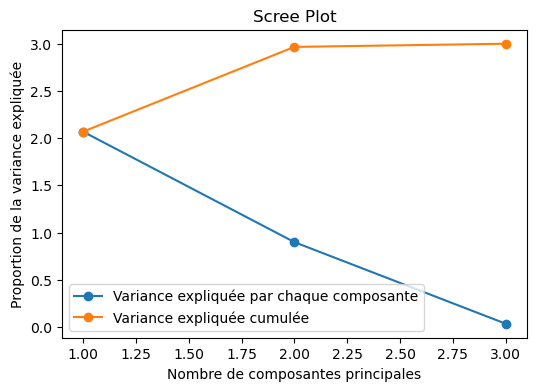

In [650]:
# Calculer la variance expliquée cumulée
explained_variance = pca.explained_variance_

cumulative_explained_variance = np.cumsum(explained_variance)

# Créer un scree plot avec la variance expliquée cumulée
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée')
plt.title('Scree Plot')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()

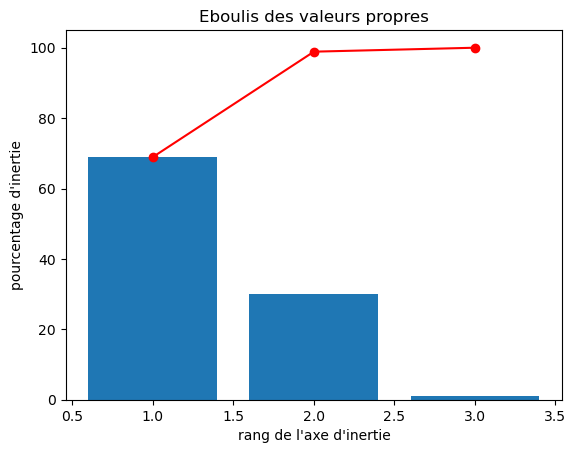

In [651]:
scree = (pca.explained_variance_ratio_*100).round(2)
x_list = range(1, n_components+1)

scree_cum = scree.cumsum().round(2)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red", marker="o")
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

Application de la methode Kmeans 

In [652]:
X_proj = pca.transform(X)
X_df = pd.DataFrame(X_proj, columns=[f'F{i+1}' for i in range(n_components)])

In [653]:

# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

silhouette = []
# Notre liste de nombres de clusters : 
k_list = range(2,8)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

c:\Users\ibrah\anaconda3\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\ibrah\anaconda3\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\ibrah\anaconda3\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\ibrah\anaconda3\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

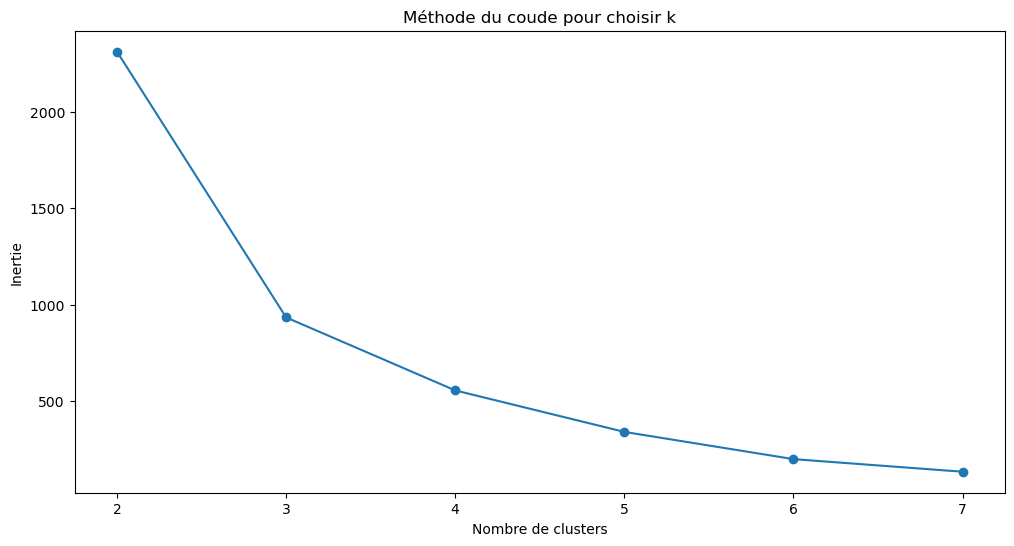

In [654]:

plt.figure(figsize=(12, 6))
plt.plot(k_list, intertia_list, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour choisir k")
plt.show()

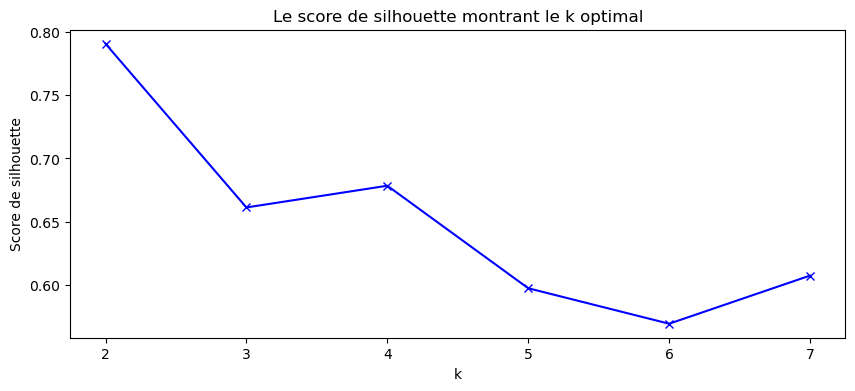

In [655]:
plt.figure(figsize=(10,4))
plt.plot(k_list, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

In [656]:
kmeans = KMeans(n_clusters=4, random_state=42,n_init=10)
kmeans.fit_predict(X)
X_df["cluster"] = kmeans.labels_
dff["cluster"] = kmeans.labels_

c:\Users\ibrah\anaconda3\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


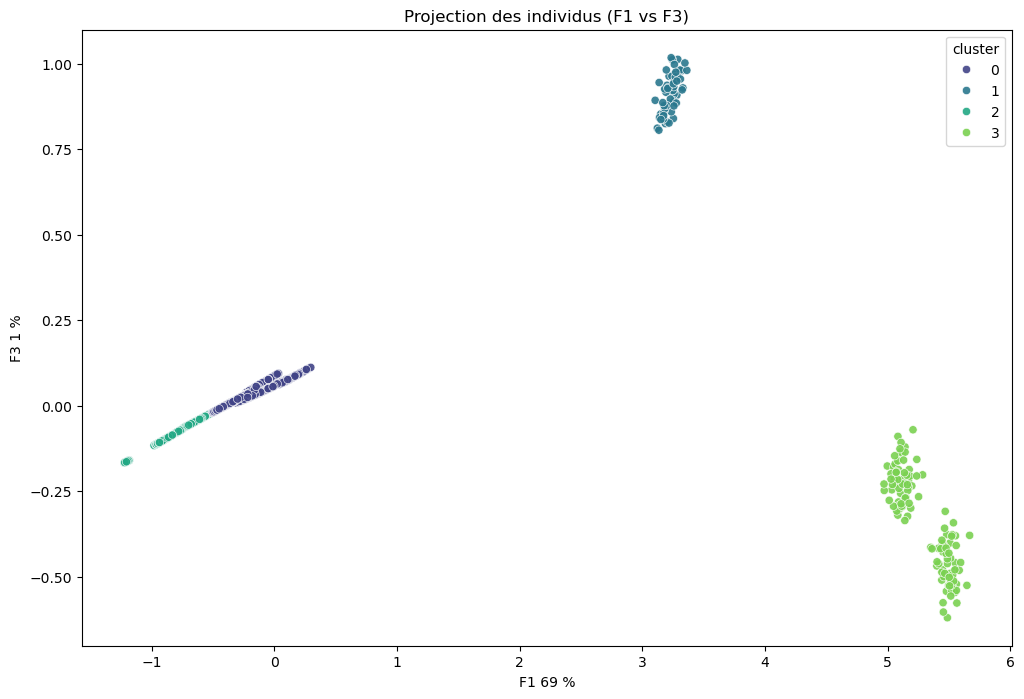

In [657]:
# Fonction de visualisation
def display_factorial_planes(X_proj, x_y, pca=None, labels=None, clusters=None, alpha=0.9, figsize=[10,8], marker="o"):
    X = np.array(X_proj)
    x, y = x_y

    fig, ax = plt.subplots(1, 1, figsize=figsize)
    # c = None if clusters is None else clusters
    unique_clusters = np.unique(clusters)
    palette = sns.color_palette("viridis", len(unique_clusters))  # Plus de couleurs disponibles
    
    sns.scatterplot(x=X[:, x], y=X[:, y], hue=clusters, palette=palette, marker=marker, alpha=alpha)

    if pca:
        v1 = str(round(100 * pca.explained_variance_ratio_[x])) + " %"
        v2 = str(round(100 * pca.explained_variance_ratio_[y])) + " %"
    else:
        v1 = v2 = ''

    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')
    
    plt.title(f"Projection des individus (F{x+1} vs F{y+1})")
    plt.show()

# Affichage des clusters en projection PCA
display_factorial_planes(X_proj, [0,2], pca, clusters=dff["cluster"], figsize=(12,8))

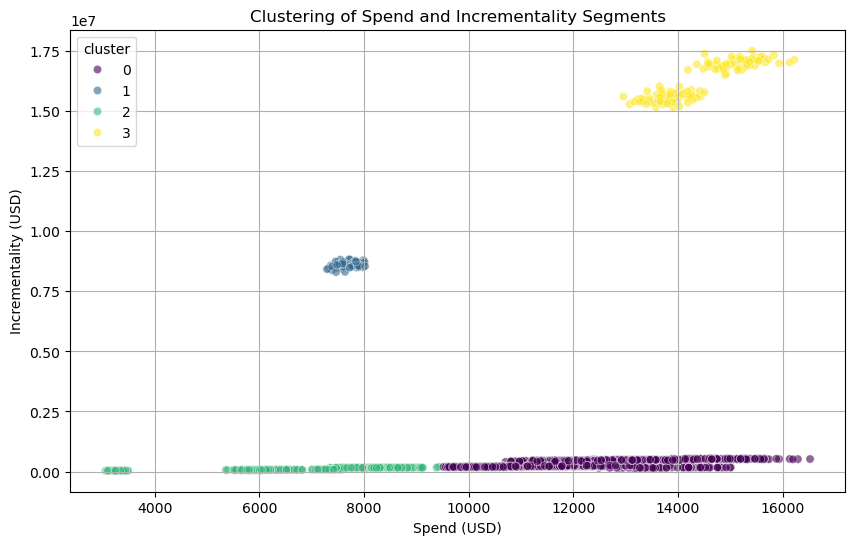

In [658]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dff["spend"], y=dff["Incrementality"], hue=dff["cluster"], palette="viridis", alpha=0.6)
plt.xlabel("Spend (USD)")
plt.ylabel("Incrementality (USD)")
plt.title("Clustering of Spend and Incrementality Segments")
plt.legend(title="cluster")
plt.grid(True)
plt.show()

In [695]:
df_cluster_segement = dff.groupby(["cluster","HotelSuperRegion","Device","StarRating"]).agg(
    total_spend = ("spend","sum"),
    total_Incrementality = ("Incrementality","sum"),
    mean_SpendEfficiency = ("Spend Efficiency","mean")
).reset_index()

In [696]:
budget = 2_000_000  # $2M budget
df_cluster_segement["Projected Incrementality"] = df_cluster_segement["mean_SpendEfficiency"] * budget

In [700]:
df_cluster_segement = df_cluster_segement.sort_values(by="mean_SpendEfficiency",ascending=False).head(10)
df_cluster_segement["segment"] = df_cluster_segement["HotelSuperRegion"] +'-'+ df_cluster_segement["Device"] +'-'+df_cluster_segement["StarRating"]

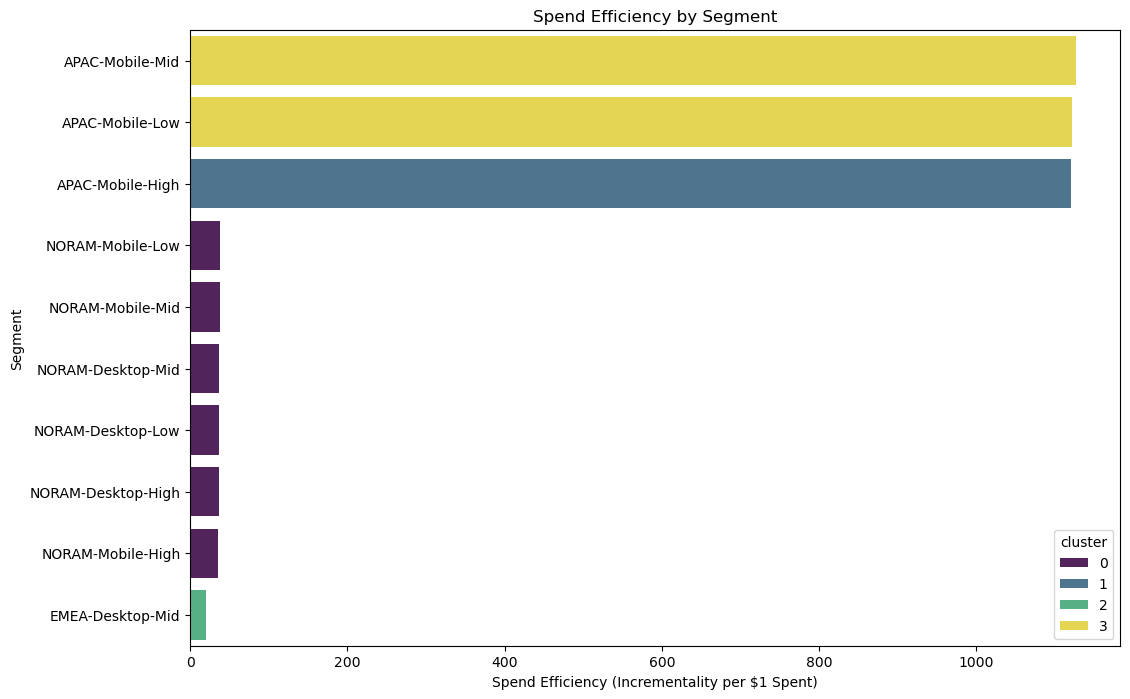

In [701]:
plt.figure(figsize=(12,8))
ax =sns.barplot(data=df_cluster_segement, y="segment", x="mean_SpendEfficiency",hue="cluster", alpha=0.9, palette="viridis")
ax.set_xlabel("Spend Efficiency (Incrementality per $1 Spent)")
ax.set_ylabel("Segment")
ax.set_title("Spend Efficiency by Segment")
plt.show()

In [703]:
df_cluster_segement[["segment","mean_SpendEfficiency","total_Incrementality"]]

,segment,mean_SpendEfficiency,total_Incrementality
27,APAC-Mobile-Mid,1126.970981,933408500
26,APAC-Mobile-Low,1121.461600,1020026300
16,APAC-Mobile-High,1120.354371,516101900
14,NORAM-Mobile-Low,38.073177,41689350
15,NORAM-Mobile-Mid,37.193941,44232656
12,NORAM-Desktop-Mid,36.659310,40683813
11,NORAM-Desktop-Low,36.356663,38442778
10,NORAM-Desktop-High,36.003573,44268317
13,NORAM-Mobile-High,34.984211,48228889
23,EMEA-Desktop-Mid,20.430117,192656


### Recommandation d’allocation budgétaire (2 M$)

**Constat** :

- Les segments APAC-Mobile (Mid, Low, High) affichent des niveaux d’efficacité de dépense (mean_SpendEfficiency) très élevés (au-delà de 1000), associés à une total_Incrementality également importante (plus de 500 million de dollars).
- Les segments NORAM-Mobile et NORAM-Desktop (Low/Mid) présentent des niveaux d’efficacité intermédiaires (entre ~35 et 40).
- Le segment EMEA-Desktop-Mid est le moins performant du lot (efficacité d’environ 20).

**Proposition de répartition**

- APAC-Mobile-Mid : ~40 % du budget (800 000 $)
- APAC-Mobile-Low : ~30 % du budget (600 000 $)
- APAC-Mobile-High : ~20 % du budget (400 000 $)
- NORAM-Mobile-Low : ~5 % du budget (100 000 $)
- NORAM-Mobile-Mid : ~3 % du budget (60 000 $)
- NORAM-Desktop-Mid : ~2 % du budget (40 000 $)
- EMEA-Desktop-Mid : 0 % (ou un montant très réduit si nécessaire pour des raisons stratégiques ou de présence marché)

**Justification**

- Les segments APAC-Mobile dominent nettement en termes de SpendEfficiency et de Projected Incrementality.
Il est donc logique de leur attribuer la majeure partie du budget pour maximiser le ROI.
- Les segments NORAM, bien que moins performants que ceux d’APAC, conservent une efficacité suffisamment élevée pour justifier un investissement complémentaire : cela permet de diversifier géographiquement et de tirer profit de ces marchés sans trop diluer le retour global.